<header>
        <div style="overflow: auto;">
        <img src="./images/AMS_LogoRED3.png" style="float: left;" width="300" />
        <img src="./images/TUDelft.jpg" style="float: right;" />
    </div>
    <div style="text-align: center;">
        <h1> AMS Data1 </h1>
        <h2>Workshop 5: Networks</h2>
        <h6>&copy; 2023, TU Delft. Hans Hoogenboom, Creative Commons</h6>     
    </div>
    <br>   
    <br>
</header>

## Diagrams
<p>
<a href='https://en.wikipedia.org/wiki/Unified_Modeling_Language'>UML (Unified Modeling Language)</a><br>
<div style="overflow: auto;">
<img src="./images/tools_uml.png" style="float: left;" width="600" />
</div><br>
</p>
<p>
<a href='https://en.wikipedia.org/wiki/Flowchart'>Flow charts</a>
<div style="overflow: auto;">
<img src="./images/Euclid_flowchart.svg" style="float: left;" width="200" />
</div>
<font size=1>By Somepics - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=37859894</font>
<p>It is easy to create flow charts using for example the tools on the website <a href='https://app.diagrams.net/'>Diagrams.net</a></p>
<p>Or you can use <a href='https://en.wikipedia.org/wiki/Pseudocode'>pseudo code</a> or better <a href='https://en.wikipedia.org/wiki/Structured_English'>Structured English</a> (or of course another language of your choice).</p>

In Python you can quickly prototype by creating almost empty functions. An empty function in Python throws an error but we have a cheat called <i>pass</i>.


In [3]:
def my_dysfunctional_function():
    pass

In [4]:
def energy_costs(building_volume, energy_price):
   pass

building_volume = None
energy_price = None
energy_costs(building_volume, energy_price)

# !!!And pen and paper!!! SKETCH

### Networks
Last week we installed Pandas and this week we will have another Panda installed, this time the Geopandas library. In fact we/you are going to install quite a few libraries. I lost track of them so when executing the examples you might get an error about a missing library. Most if not all the time you can do a *pip install missing_library* on the command line, then restart the kernel of your current Jupyter notebook and continue. The restart option is located above under the menu Kernel.

When doing any scientific computing with Python, there is a 99.999% chance you are going to use [Numpy](https://numpy.org/). Numpy is often imported with the abbreviation np. The same with Pandas, it is imported as pd. For analysing networks there is a library called [Networkx](https://networkx.org/), imported as nx. After a while you start noticing these abbreviations in the names of methods or functions of other libraries. Then you sort of know what library is used and what datatype or object you will need to input or that will be returned to you. Apart from Numpy, another library that is almost always used under the hood is [Matplotlib](https://matplotlib.org/). A lot of other "plotters" are wrapped around functionality provided by Matplotlib.

#### NetworkX
We can install networkx the obvious way. The functions of NetworkX work on *Graph* objects, the methods of Graphs are used for basic manipulation or reporting. Internally the Graph object is organizaed as your favorite Python structure, the dictionary. A network/graph consists of nodes and edges. The nodes need to be of a hashable type, a type that can't be changed (like a string or a number). Edges can hold any kind of data.

You can create an empty Graph using the Graph() function.

In [5]:
import networkx as nx
G = nx.Graph()
print(type(G))
print(G)

<class 'networkx.classes.graph.Graph'>
Graph with 0 nodes and 0 edges


We can add nodes from different kind of data, for example from a string:

In [6]:
G.add_nodes_from("Data1")
# You can use the code below to remove all
# entities from a graph
#G.clear()
print(G)

Graph with 4 nodes and 0 edges


Do you see something peculiar in the output? We can also create a list of nodes from a range of numbers:

In [7]:
F = nx.Graph()
F.add_nodes_from(range(1, 10))
print(F)

Graph with 9 nodes and 0 edges


We can add edges between nodes using the add-edges method. You can give a tuple to create a single edge between two nodes or a list of tuples to create several edges at once.

In [8]:
print(G)
G.add_edges_from([('D', 'a'), ('t', '1')])
print(G)

Graph with 4 nodes and 0 edges
Graph with 4 nodes and 2 edges


We can plot the graph using matplotlib. For a more extensive tutorial on plotting with Plotly see [here](https://plotly.com/python/network-graphs/).

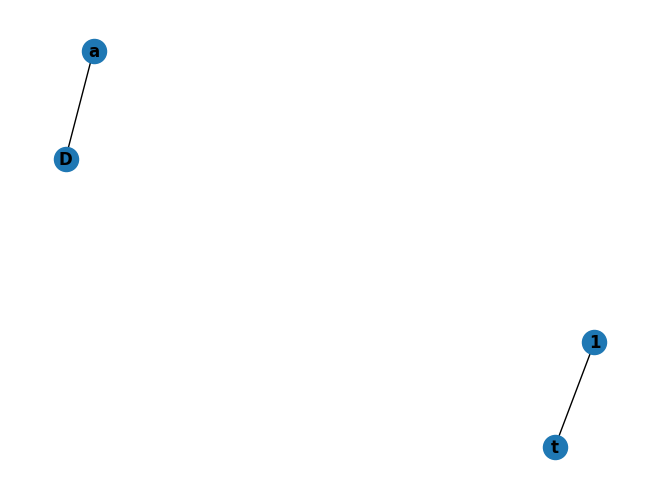

In [9]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, font_weight='bold')

Let's connect the dots and print it again.

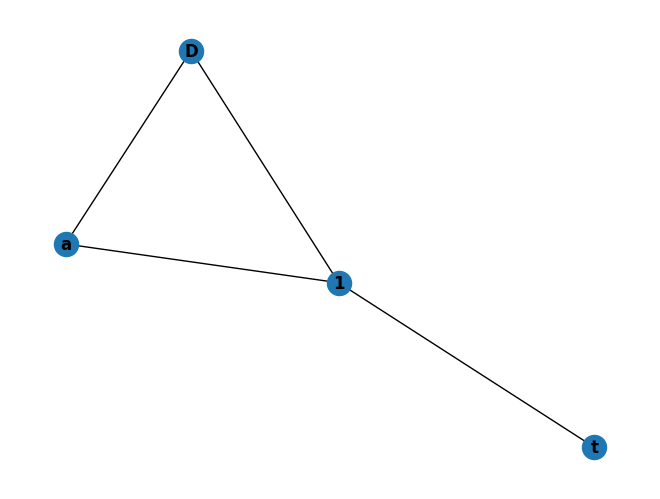

In [10]:
G.add_edges_from([('a', '1'), ('D', '1')])
nx.draw(G, with_labels=True, font_weight='bold')

Since the Graph is a bit like a dictionary, you won't be surprised that if, with the add_edges method, you use a node name that doesn't exist, it automatically get's added. With the methods number_of_nodes() and number_of_edges() you can get the obvious data from the graph. We can also get a list of the edges and ndoes using the G.nodes() or G.edges() inside a list() statement.

In [11]:
print(list(G.edges))
list(G.nodes)

[('D', 'a'), ('D', '1'), ('a', '1'), ('t', '1')]


['D', 'a', 't', '1']

We can add any attributes to our Graph, to the nodes and to the edges.G.

In [12]:
G.graph['title']="My First Graph"
G.graph

{'title': 'My First Graph'}

To edges:

In [13]:
G.edges['D', 'a']["distance"] = 2
G.edges['D', '1']["distance"] = 200
G.edges['1', 'a']["distance"] = 1
G.edges['t', '1']["distance"] = 2000

We can get the data from the nodes and edges as shown below.

In [14]:
G.nodes['D']['first'] = True
G.nodes['a']['first'] = False
print(G.edges['D', 'a'])
print(G.nodes['D'])

{'distance': 2}
{'first': True}


One thing we can do with networks is to calculate the shortest path between nodes:

In [15]:
print(G)
# just count the number of nodes traversed
path = nx.shortest_path(G, 't', 'D')
print(path)
# use attribute weight to calculate the shortest path
path = nx.shortest_path(G, 't', 'D', weight="distance")
print(path)
length = nx.shortest_path_length(G, 't', 'D', weight="distance")
length

Graph with 4 nodes and 4 edges
['t', '1', 'D']
['t', '1', 'a', 'D']


2003

The shortest path uses [Dijkstra's Algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) by default. There are a few other algorithms depending on what type of graph you have or how many nodes you use (one to one or one to many).

If you want to read a more extended introduction into NetworkX, have a look at the [intro page](https://networkx.org/documentation/stable/reference/introduction.html). You can find more educational material [here](https://networkx.org/nx-guides/index.html).

### GeoPandas
For GIS and spatial analysis [GeoPandas](https://geopandas.org/en/stable/index.html) has been developped. You can probably guess that it looks a loot like Pandas and it does. Let's see it as a Pandas dataframe (Excel sheet) but with some extra attached columns holding geometry. Further it extends Pandas with functions and methods to deal with this geometry. There are for example functions to add geographic regions together or to calculate their area etc. Next to Pandas, GeoPandas is also dependent on Matplotlib, Fiona and [Shapely](https://shapely.readthedocs.io/en/stable/manual.html). The last one can be very useful if you want to proces planar geometry. 

## OSMNX
An interesting project is OSMNX. It is a little bit more useful outside of Europe since we have often very well supplied governmental databases. This is super nice but unfortunately they are scattered all over the internet. In the USA a lot of municipalities use OpenStreetMap to store their data and thuse a treasure trove for the GIS specialist. Still it is a useful tool when used in combination with other tools (like QGIS).

OSMN is imported as ox. We can create a graph in several ways, the easiest is by giving the name of the location we want to have. It can take a bit of time till all the data is loaded so be patient. You can always read the data in, theN save it to a file so you can reuse it later without the extra waiting time.

In [16]:
import osmnx as ox
city = (ox.graph_from_place('Amsterdam, Netherlands'))
# matlplot lib is used, sizes go in inches...
ox.plot_graph(city, figsize=(12,6))

KeyboardInterrupt: 

Okay, took a while but we have now all the streets/walkways/tram lines of Amsterdam. We always check first what kind of data we have:

In [17]:
print(type(city))
print(city)

NameError: name 'city' is not defined

As you can see OSMNX does use networkx for its datatypes. It is basically a wrapper around the [OSM python API](https://wiki.openstreetmap.org/wiki/API) and Networkx. Let's write this data to disk and then read it back in:

In [ ]:
filename = "adam_data.nx"
with open(filename, 'wb') as fhandle:
    fhandle.write(city)

TypeError: a bytes-like object is required, not 'MultiDiGraph'

That didn't work unfortunately. In Python there is a special way to write data to a file (or stream) using the pickle module. Pickle doesn't use a read or write method but a *dump* and *load*.

In [ ]:
import pickle

filename = "adam_data.nx"

with open(filename, 'wb') as fhandle:
    pickle.dump(city, fhandle)

We can load this back in in almost the same way.

<class 'networkx.classes.multidigraph.MultiDiGraph'>
MultiDiGraph with 61207 nodes and 161827 edges


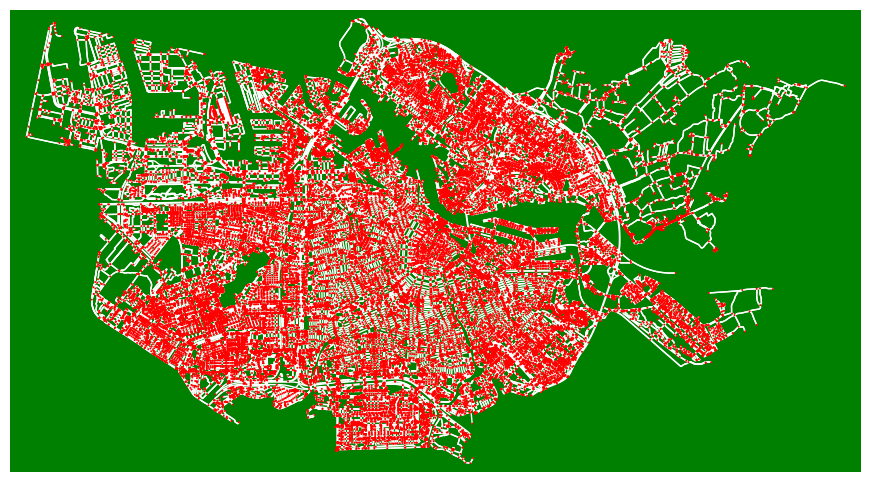

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

In [20]:
import osmnx as ox
import pickle

filename = "adam_data.nx"

with open(filename, 'rb') as fhandle:
    new_city = pickle.load(fhandle)

print(type(new_city))
print(new_city)
ox.plot_graph(new_city, bgcolor='green', node_color='red', node_size=2, edge_color='white', figsize=(12,6))

OSMNX itslef comes with quite a few functions to save your data to formats that other GIS programs or Python libraries can read.

Below an example to get just the boundary of the municipality of Amsterdam:

<class 'geopandas.geodataframe.GeoDataFrame'>
                                            geometry  bbox_north  bbox_south  \
0  MULTIPOLYGON (((4.72876 52.40071, 4.73371 52.4...   52.431064   52.278174   

   bbox_east  bbox_west   place_id  osm_type  osm_id       lat       lon  \
0   5.079162   4.728756  138313584  relation  271110  52.37308  4.892453   

      class            type  place_rank  importance addresstype       name  \
0  boundary  administrative          16    0.726813        city  Amsterdam   

                            display_name  
0  Amsterdam, North Holland, Netherlands  


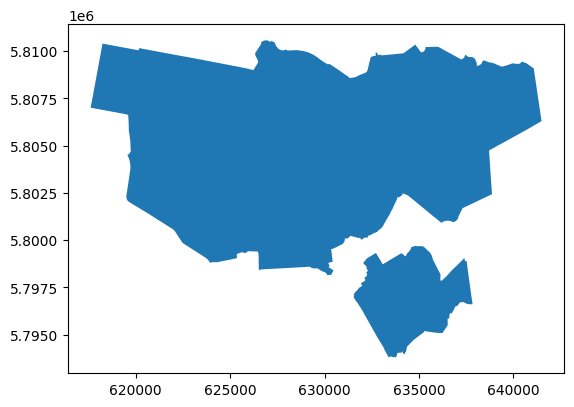

In [21]:
boundary = ox.geocode_to_gdf('Amsterdam, Netherlands')
print(type(boundary))
print(boundary.head())
ax = ox.project_gdf(boundary).plot()

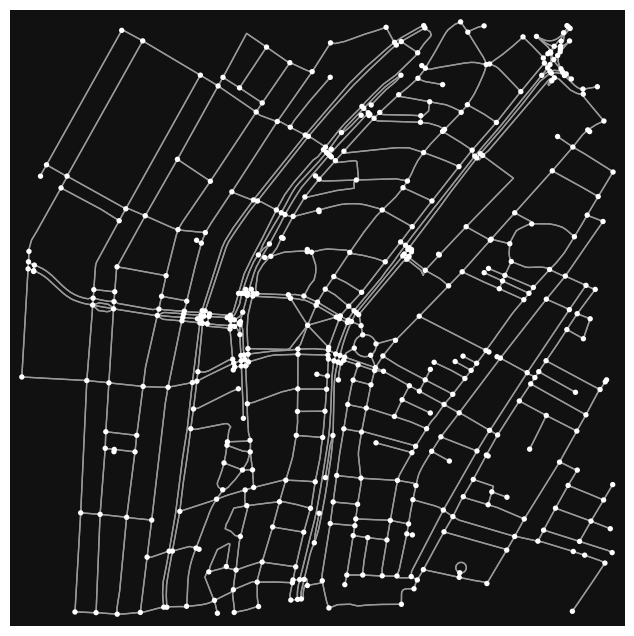

{'y': 52.3698538, 'x': 4.8979818, 'street_count': 4}

In [22]:
rokin = ox.graph_from_address('Dam, Amsterdam, Netherlands', dist=500, network_type='walk')
ox.plot_graph(rokin)
rokin.nodes[46377925]

As a small exercise, you could see how the network looks if you only get the areas where you can walk or drive. You can add this filter by adding network_type='type_of_transport' to the query. 

The plot function is also used to save a file to disk:

In [23]:
fig, ax = ox.plot_graph(rokin, filepath='image.svg', save=True, show=False, close=True)

With the *features_** functions you can query for OpenStreetMap features. An extensive list can be found [here](https://wiki.openstreetmap.org/wiki/Map_features).

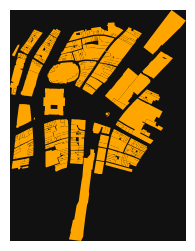

In [24]:
place = "Dam, Amsterdam, Netherlands"
tags = {"building": True}
gdf = ox.features_from_address(place, tags, dist=200)
gdf.shape
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

### Finding nodes, Geocoding

OSM is build up of nodes with data attached including geometric data. But it is all in numbers and it is very hard to remember that your address is at node 22345339. It is also annoying looking up a node id on the website of OSM. OSM uses the Nominatim api to convert addresses to a coordinate (latitude, longitude). OSMNX has a method to do this using Python. Another Python library is Geocoder used by programs like QGIS and ArcGIS.

In [25]:
location = ox.geocode("Leidsestraat 1, Amsterdam, Netherlands")
print(type(location))
print(location)

<class 'tuple'>
(52.365693, 4.8861086)


In [26]:
location_to = ox.geocode("Taksteeg 12, Amsterdam, Netherlands")
print(location_to)

(52.3692745, 4.8914276)


In [28]:
nodes = ox.distance.nearest_nodes(new_city, location[1], location[0], return_dist=True)
nodes_to = ox.distance.nearest_nodes(new_city, location_to[1], location_to[0], return_dist=True)
print(nodes, nodes_to)

(4851679567, 18.066418827278774) (46374693, 28.40824699709526)


With the [OSMNX distance](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.distance) module you can find the shortest path between two nodes. The *shortest_path* function needs a Graph, and a start and end point. By default it uses the attribute *length* to calcualte the distances between nodes. This attribute is added automatically when reading in data using one of the *graph_** functions. In case you are missing the attribute, your data is coming from somewhere else, you can use the *add_edge_length* function.

Node found.
Node found.


[4851679567, 4851679559, 4851679557, 7951323375, 7951323376, 7951335700, 3177569947, 3177570377, 46367105, 46368011, 288303511, 3177569949, 46368991, 8121695896, 46373286, 46374693]


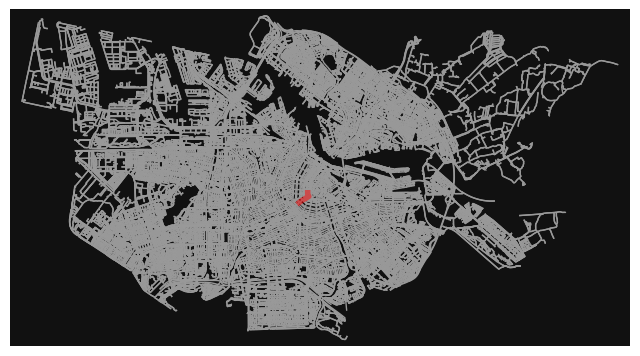

AttributeError: module 'osmnx' has no attribute 'utils_geo'

In [33]:
if nodes[0] in new_city.nodes:
    print("Node found.")
if nodes_to[0] in new_city.nodes:
    print("Node found.")
path = ox.shortest_path(new_city, nodes[0], nodes_to[0])
print(path)
fig, ax = ox.plot_graph_route(new_city, path, orig_dest_size=0, node_size=0)
pt = ox.graph_to_gdfs(new_city, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point(location, dist=900)
fig, ax = ox.plot_graph_route(new_city, path, bbox=bbox)

## Group Exercise
Find the address of your appartment and plot the route to the AMS. Plot all routes from your group in one graph. 

Nodes found.


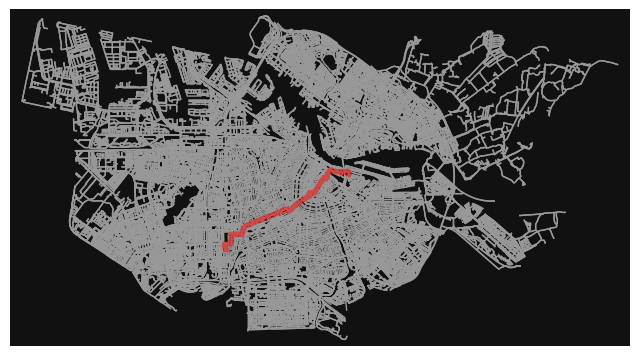

In [42]:
house_loc = ox.geocode("Poeldijkstraat 371, Amsterdam, Netherlands")
AMS_loc = ox.geocode("Kattenburgerstraat 5, Amsterdam, Netherlands")

house_node = ox.distance.nearest_nodes(new_city, house_loc[1], house_loc[0], return_dist=True)
AMS_node = ox.distance.nearest_nodes(new_city, AMS_loc[1], AMS_loc[0], return_dist=True)

if house_node[0] in new_city.nodes and AMS_node[0] in new_city.nodes:
    print("Nodes found.")
    shortest_route = ox.shortest_path(new_city, house_node[0], AMS_node[0])
    fig, ax = ox.plot_graph_route(new_city, shortest_route, orig_dest_size=0, node_size=0)


    

#### A Long List of Useful Links
https://github.com/gboeing/osmnx-examples

https://geoffboeing.com/2016/11/osmnx-python-street-networks/

https://osmnx.readthedocs.io/en/stable/user-reference.html

https://github.com/mocnik-science/osm-python-tools

https://github.com/mocnik-science/osm-python-tools/blob/master/docs/data.md

https://github.com/mocnik-science/osm-python-tools/blob/master/docs/overpass.md

https://towardsdatascience.com/shortest-path-algorithm-used-in-osm-street-network-33e0f864f34b

https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

https://gisgeography.com/python-libraries-gis-mapping/

https://python-visualization.github.io/folium/latest/getting_started.html

https://python.plainenglish.io/osmnx-the-fastest-way-to-get-data-from-openstreetmaps-731419d4dc31

https://docs.qgis.org/3.28/en/docs/gentle_gis_introduction/coordinate_reference_systems.html